# Statistical Analysis of Keywords

### Import Packages

In [1]:
from datetime import datetime
start_time = datetime.now()

# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:00.791641


### Import Results

In [2]:
results = pd.read_csv('Results/final_results.csv')

In [3]:
results_table = pd.read_csv('Results/final_results_table_location.csv')

In [4]:
results = results.drop_duplicates()
results_table = results_table.drop_duplicates()

In [5]:
results = results.groupby('CIK').head(1)
results

,CIK,Company Name,SIC,Industry,State Location,State Inc,Filling Date,URL,digital asset,cryptocurrency,cryptocurrencies,digital holdings,bitcoin,ethereum,digital asset_table,cryptocurrency_table,cryptocurrencies_table,digital holdings_table,bitcoin_table,ethereum_table
0,320193,Apple Inc.,3571,ELECTRONIC COMPUTERS,CA,CA,2021-10-29,https://www.sec.gov/Archives/edgar/data/320193...,0,0,0,0,0,0,0,0,0,0,0,0
1,789019,MICROSOFT CORP,7372,SERVICES,WA,WA,2021-07-29,https://www.sec.gov/Archives/edgar/data/789019...,0,0,0,0,0,0,0,0,0,0,0,0
2,1652044,Alphabet Inc.,7370,SERVICES,CA,DE,2022-02-02,https://www.sec.gov/Archives/edgar/data/165204...,0,0,0,0,0,0,0,0,0,0,0,0
4,1018724,AMAZON COM INC,5961,RETAIL,WA,DE,2022-02-04,https://www.sec.gov/Archives/edgar/data/101872...,0,0,0,0,0,0,0,0,0,0,0,0
6,1318605,"Tesla, Inc.",3711,MOTOR VEHICLES & PASSENGER CAR BODIES,CA,DE,2022-02-07,https://www.sec.gov/Archives/edgar/data/131860...,49,0,0,0,12,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,1853825,THUMZUP MEDIA Corp,7374,SERVICES,NV,NV,2022-03-17,https://www.sec.gov/Archives/edgar/data/185382...,0,0,0,0,0,0,0,0,0,0,0,0
9963,885275,WILSON BANK HOLDING CO,6021,NATIONAL COMMERCIAL BANKS,TN,TN,2022-03-15,https://www.sec.gov/Archives/edgar/data/885275...,0,0,0,0,0,0,0,0,0,0,0,0
9965,1648636,Trillion Energy International Inc.,1311,CRUDE PETROLEUM & NATURAL GAS,W8,DE,2021-04-01,https://www.sec.gov/Archives/edgar/data/164863...,0,0,0,0,0,0,0,0,0,0,0,0
9966,107815,WISCONSIN ELECTRIC POWER CO,4911,ELECTRIC SERVICES,WI,WI,2022-02-24,https://www.sec.gov/Archives/edgar/data/107815...,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
results['Company Name'].value_counts()

Apple Inc.                                  1
Surface Oncology, Inc.                      1
Perma-Pipe International Holdings, Inc.     1
CBAK Energy Technology, Inc.                1
EXAGEN INC.                                 1
                                           ..
FREYR Battery                               1
NATIONAL HEALTHCARE CORP                    1
Energy Recovery, Inc.                       1
Sumo Logic, Inc.                            1
Odonate Therapeutics, Inc.                  1
Name: Company Name, Length: 5764, dtype: int64

In [7]:
pd.options.display.max_colwidth =40
results[results['Company Name']=='Trex Acquisition Corp. ']['CIK'] #['URL']

8412    1437750
Name: CIK, dtype: int64

In [8]:
results["sum"] = results["digital asset"] + results["cryptocurrency"] + results["cryptocurrencies"] + results["digital holdings"] + results["bitcoin"] + results["ethereum"]
results["sum_tables"] = results["digital asset_table"] + results["cryptocurrency_table"] + results["cryptocurrencies_table"] + results["digital holdings_table"] + results["bitcoin_table"] + results["ethereum_table"]

In [9]:
pd.set_option('display.max_columns', None)
results.drop('URL',axis=1).rename(columns={'digital asset_table':'digital asset table','cryptocurrency_table':'cryptocurrency table','digital holdings_table':'digital holdings table','cryptocurrencies_table':'cryptocurrencies table','bitcoin_table':'bitcoin table','ethereum_table':'ethereum table'}).sort_values(by="sum_tables", ascending=False).head(50)

,CIK,Company Name,SIC,Industry,State Location,State Inc,Filling Date,digital asset,cryptocurrency,cryptocurrencies,digital holdings,bitcoin,ethereum,digital asset table,cryptocurrency table,cryptocurrencies table,digital holdings table,bitcoin table,ethereum table,sum,sum_tables
8735,1162896,"Creek Road Miners, Inc.",7374,SERVICES,UT,DE,2022-03-31,16,249,81,0,174,0,0,29,4,0,5,0,520,38
1993,1050446,MICROSTRATEGY Inc,7372,SERVICES,VA,DE,2022-02-16,105,5,7,0,516,0,12,0,0,0,25,0,633,37
7868,1436229,BTCS Inc.,7372,SERVICES,MD,NV,2022-03-11,368,44,43,0,124,30,21,0,2,0,3,5,609,31
6006,1665300,"Phunware, Inc.",7374,SERVICES,X1,DE,2022-04-07,164,24,12,0,94,35,17,1,0,0,7,5,329,30
3425,1167419,"Riot Blockchain, Inc.",7374,SERVICES,CO,NV,2022-03-16,8,72,164,0,321,0,0,0,26,0,2,0,565,28
8921,1737372,"Sysorex, Inc.",7371,SERVICES,VA,NV,2022-04-14,107,45,19,0,2,132,21,1,1,0,0,3,305,26
9800,1839341,"Core Scientific, Inc./tx",7374,SERVICES,TX,DE,2022-03-30,584,3,1,1,158,9,17,0,0,1,3,0,756,21
7887,896493,"BitNile Holdings, Inc.",3679,ELECTRONIC COMPONENTS,NV,DE,2022-04-15,76,224,122,2,297,10,0,11,4,2,3,0,731,20
9520,1829311,"BITMINE IMMERSION TECHNOLOGIES, INC.",7374,SERVICES,GA,DE,2021-12-09,401,17,11,0,176,0,18,0,0,0,1,0,605,19
3021,1507605,"MARATHON DIGITAL HOLDINGS, INC.",7374,SERVICES,NV,NV,2022-03-10,208,49,38,73,387,0,4,5,4,1,5,0,755,19


In [10]:
results['crypto_yes'] = np.where(results['sum']>0,1,0)
results['crypto_table_yes'] = np.where(results['sum_tables']>0,1,0)

In [11]:
sic_dict = pd.read_csv('SIC Codes.csv')
sic_dict.columns=['SIC','Office','Sub_industry']

In [12]:
results = results.merge(sic_dict,on='SIC',how='inner')

In [13]:
#sic_dict.sort_values(ascending=True,by='SIC').head(50)

### Proportions

In [14]:
prop_crypto = results['crypto_yes'].mean()
prop_crypto_table = results['crypto_table_yes'].mean()
print("{}% of companies metion crypto in their 10-K".format(round(prop_crypto*100,2)))
print("{}% of companies metion crypto in a table within their 10-K".format(round(prop_crypto_table*100,2)))

7.13% of companies metion crypto in their 10-K
1.46% of companies metion crypto in a table within their 10-K


### Set Size of Graphs

In [15]:
plt.rcParams.update({'figure.figsize':(20,10)})
plt.rcParams.update({'font.size':16})

### Distribution of Industries

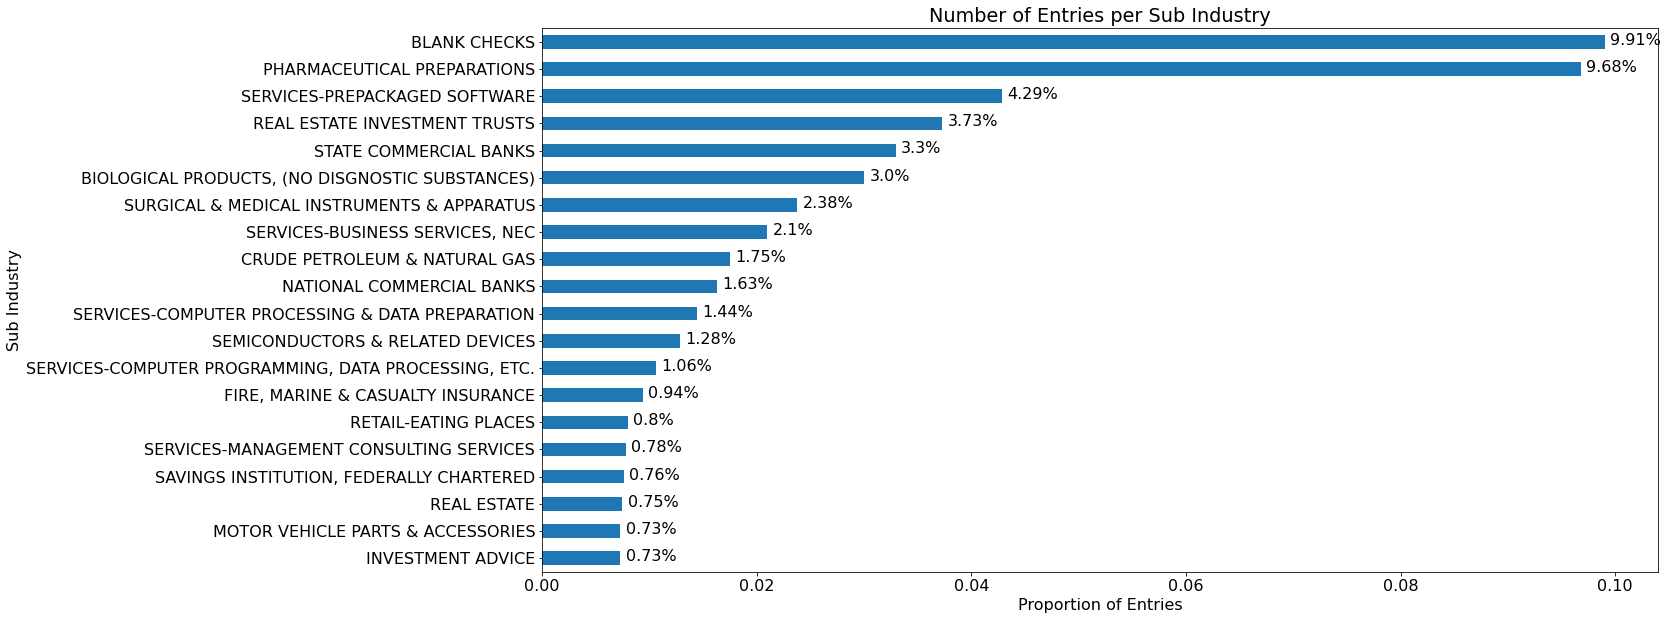

In [16]:
results['Sub_industry'].value_counts(normalize=True).head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Entries per Sub Industry')
plt.ylabel("Sub Industry")
plt.xlabel("Proportion of Entries")

own = results['Sub_industry'].value_counts(normalize=True).head(20).sort_values(ascending=True)
for i, v in enumerate(own):
    plt.text(v + 0.0005, i-0.11, str(round(v*100, 2)) + "%", color='black')

### Companies Mentioning Keywords By Sub-Industry

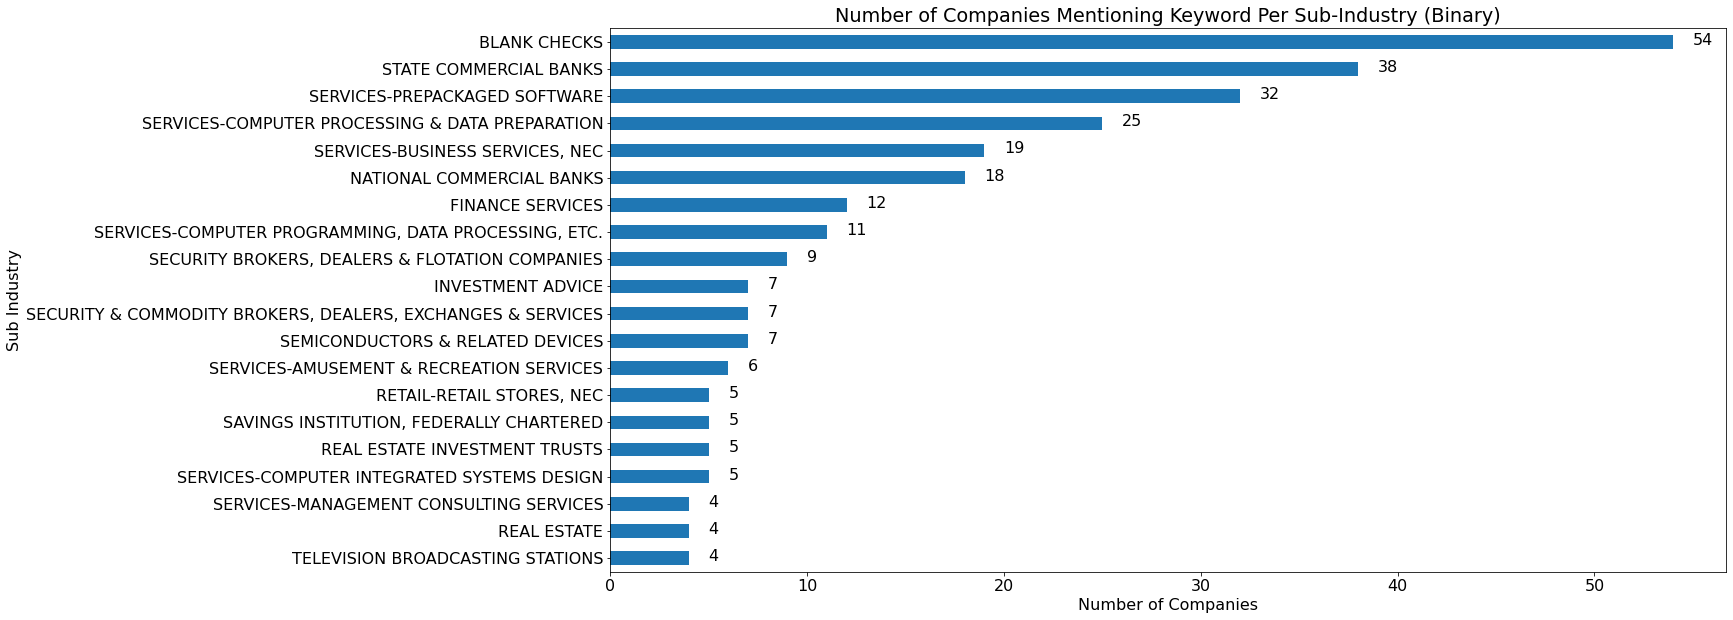

In [17]:
results.groupby('Sub_industry').sum()['crypto_yes'].sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Companies Mentioning Keyword Per Sub-Industry (Binary)')
plt.ylabel("Sub Industry")
plt.xlabel("Number of Companies")

own = results.groupby('Sub_industry').sum()['crypto_yes'].sort_values(ascending=False).head(20).sort_values(ascending=True)
for i, v in enumerate(own):
    plt.text(v + 1, i-0.11, str(round(v, 2)), color='black')

### Companies Mentioning Keywords in a Financial Table By Sub Industry

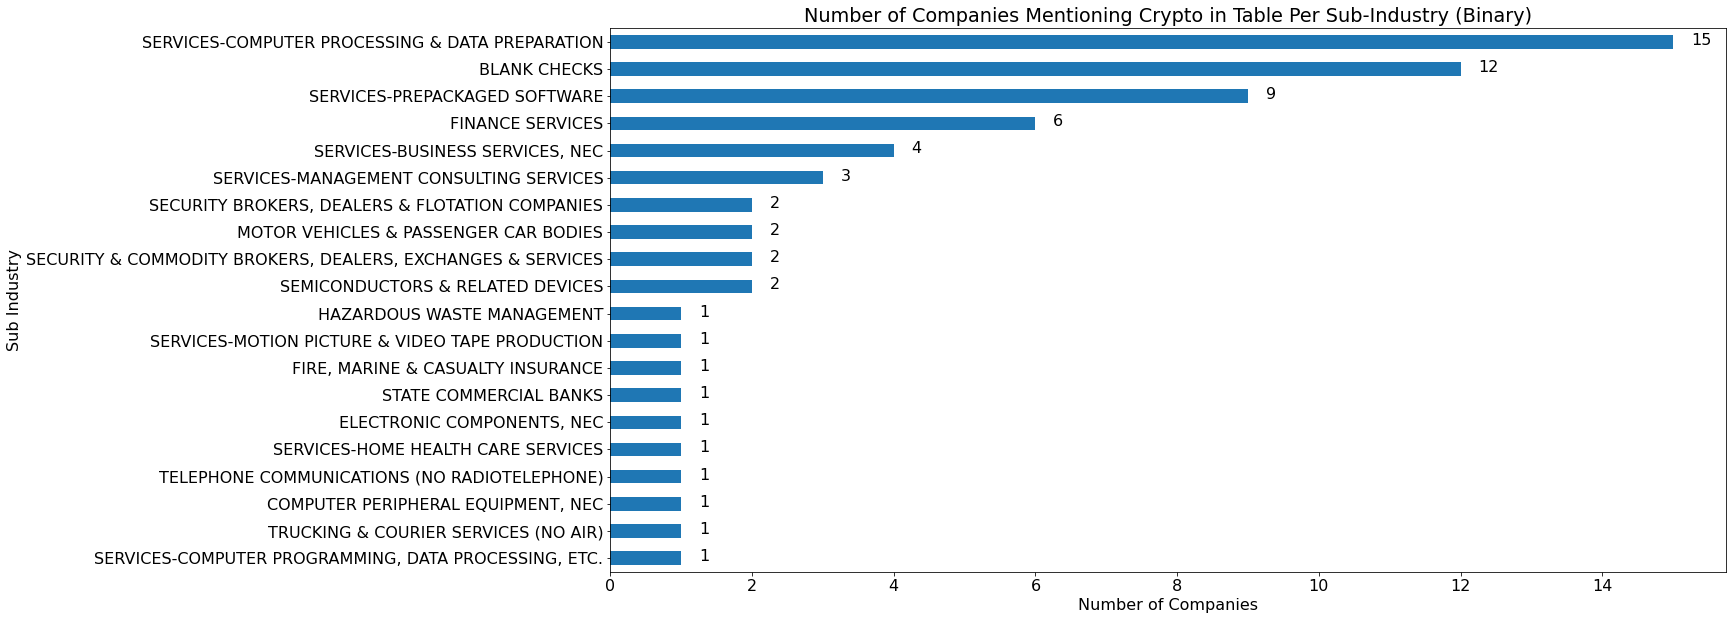

In [18]:
results.groupby('Sub_industry').sum()['crypto_table_yes'].sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Companies Mentioning Crypto in Table Per Sub-Industry (Binary)')
plt.ylabel("Sub Industry")
plt.xlabel("Number of Companies")

own = results.groupby('Sub_industry').sum()['crypto_table_yes'].sort_values(ascending=False).head(20).sort_values(ascending=True)
for i, v in enumerate(own):
    plt.text(v+0.25, i-0.11, str(round(v, 2)), color='black')

### Total Number of Keyword Mentions per Sub-Industry

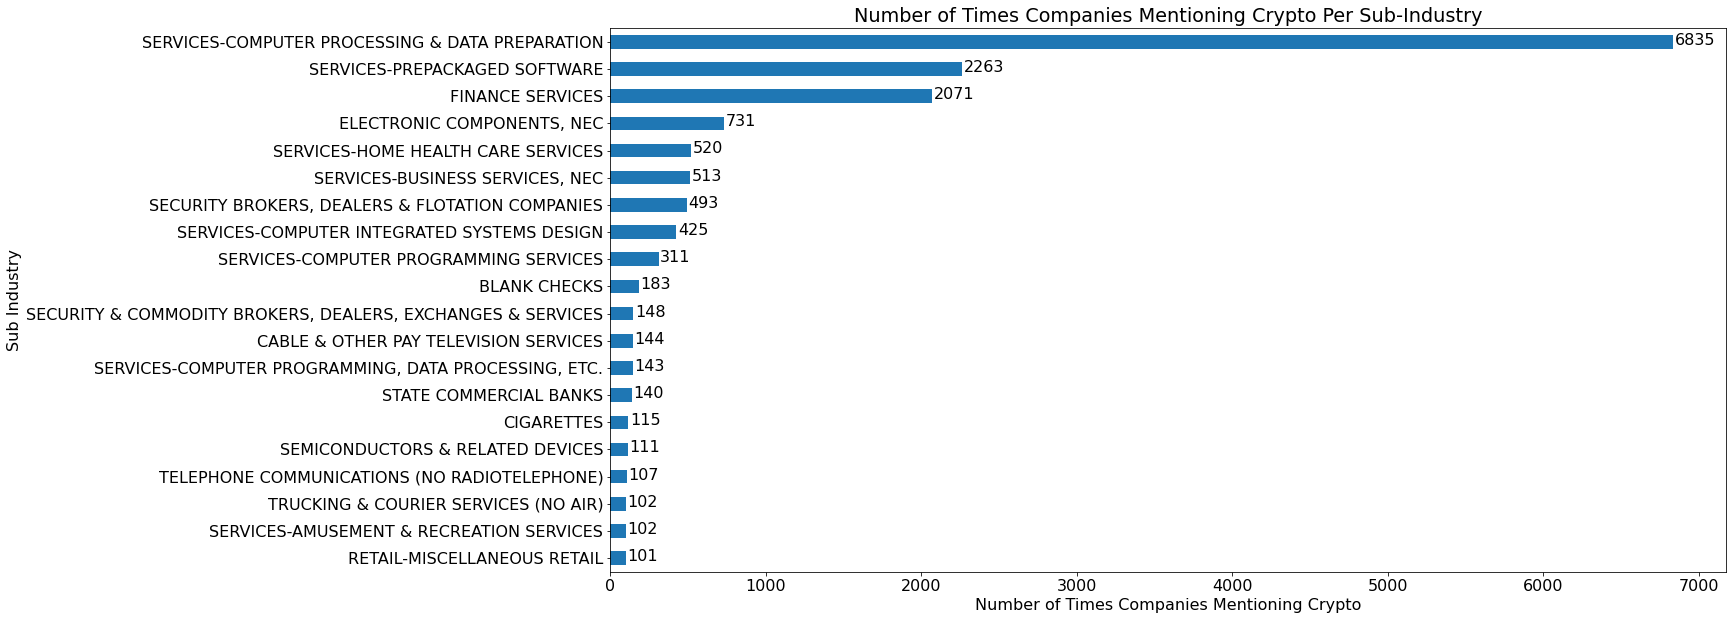

In [19]:
results.groupby('Sub_industry').sum()['sum'].sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Times Companies Mentioning Crypto Per Sub-Industry')
plt.ylabel("Sub Industry")
plt.xlabel("Number of Times Companies Mentioning Crypto")

own = results.groupby('Sub_industry').sum()['sum'].sort_values(ascending=False).head(20).sort_values(ascending=True)
for i, v in enumerate(own):
    plt.text(v + 10, i-0.11, str(round(v, 2)), color='black')

### Total Number of Keyword Mentions in a Financial Table per Sub-Industry

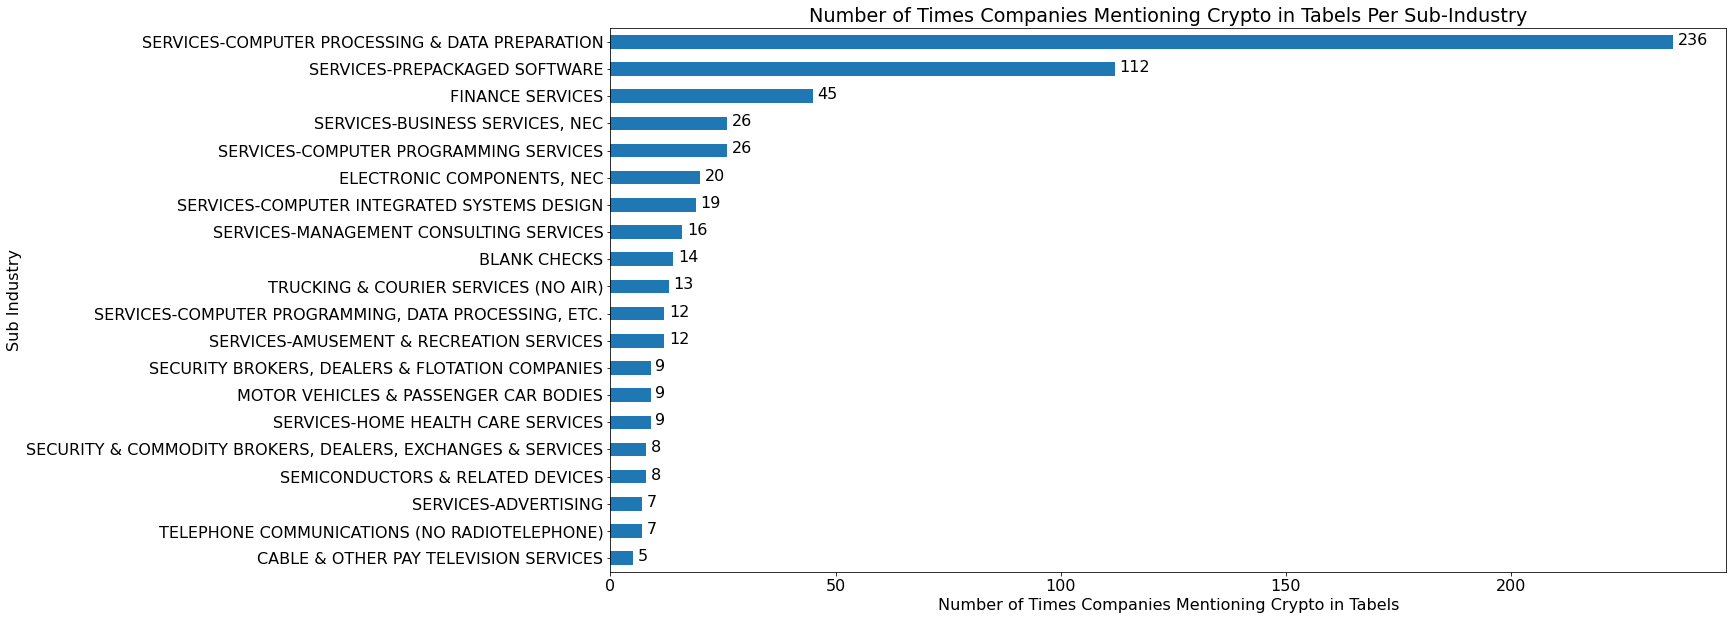

In [20]:
results.groupby('Sub_industry').sum()['sum_tables'].sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Number of Times Companies Mentioning Crypto in Tabels Per Sub-Industry')
plt.ylabel("Sub Industry")
plt.xlabel("Number of Times Companies Mentioning Crypto in Tabels")

own = results.groupby('Sub_industry').sum()['sum_tables'].sort_values(ascending=False).head(20).sort_values(ascending=True)
for i, v in enumerate(own):
    plt.text(v + 1, i-0.11, str(round(v, 2)), color='black')

### Penetration of Keywords by Sub-Industry

Filter out Sub-industries with Less than 20 Companies

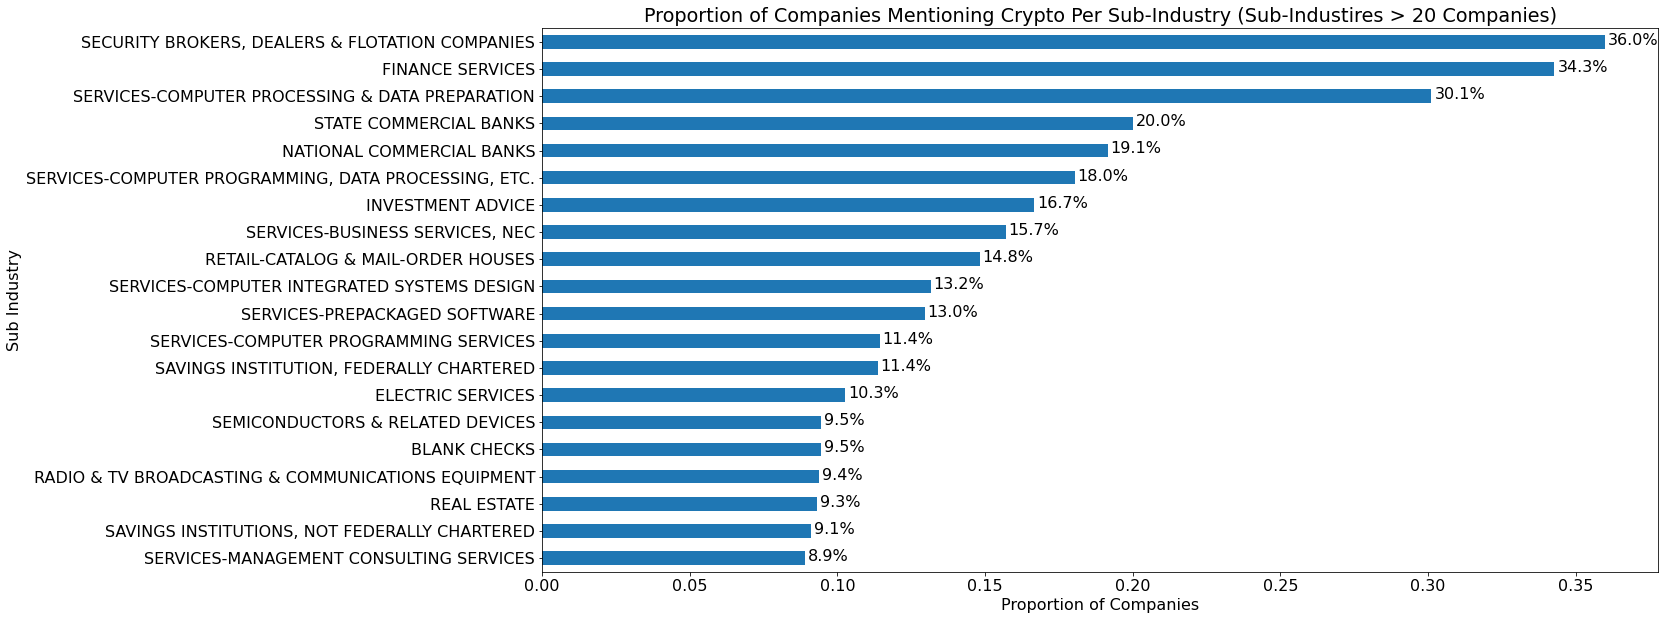

In [21]:
results.groupby('Sub_industry').filter(lambda x: len(x) > 20).groupby('Sub_industry')['crypto_yes'].mean().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Proportion of Companies Mentioning Crypto Per Sub-Industry (Sub-Industires > 20 Companies)')
plt.ylabel("Sub Industry")
plt.xlabel("Proportion of Companies")

own = results.groupby('Sub_industry').filter(lambda x: len(x) > 20).groupby('Sub_industry')['crypto_yes'].mean().sort_values(ascending=False).head(20).sort_values(ascending=True)
for i, v in enumerate(own):
    plt.text(v + 0.001, i-0.11, str(round(v*100, 1)) + "%", color='black')

### Penetration of Keywords within Financial Tables by Sub-Industry

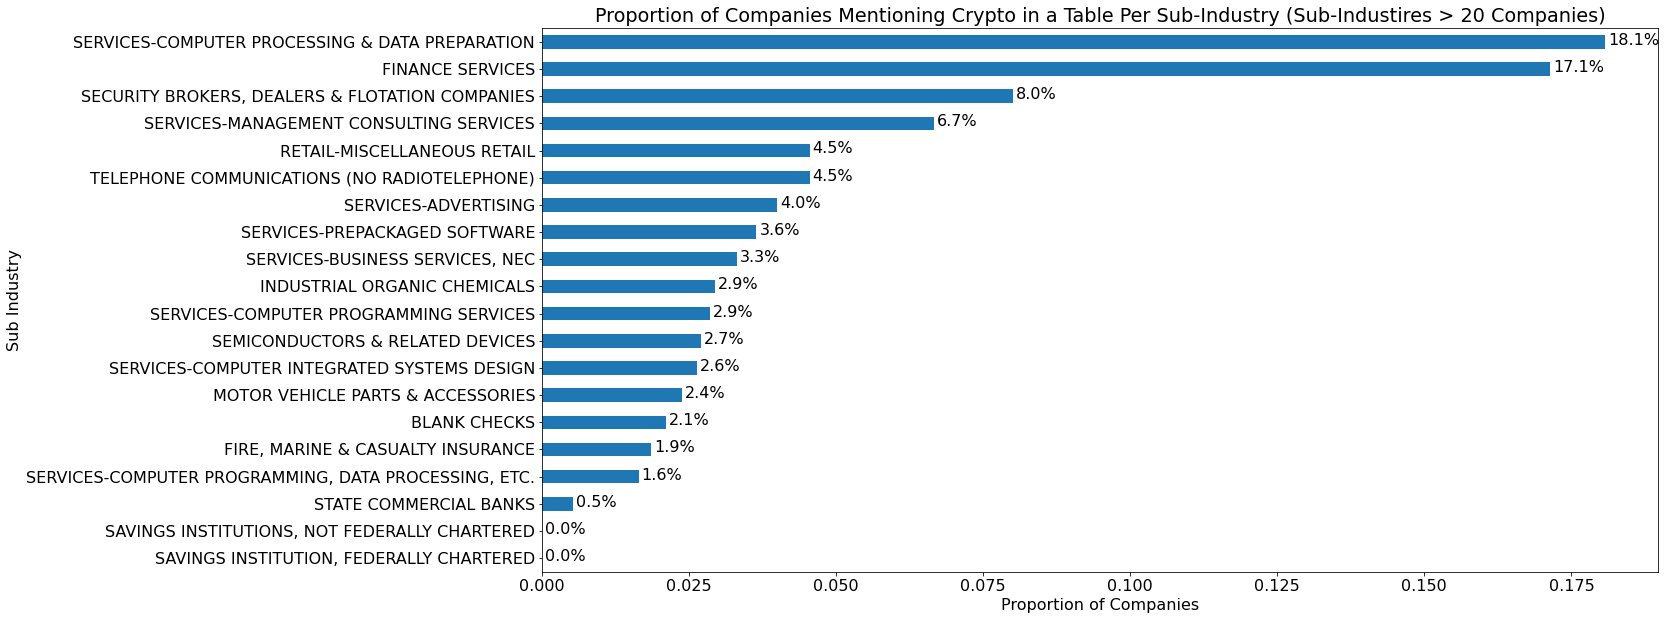

In [22]:
results.groupby('Sub_industry').filter(lambda x: len(x) > 20).groupby('Sub_industry')['crypto_table_yes'].mean().sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Proportion of Companies Mentioning Crypto in a Table Per Sub-Industry (Sub-Industires > 20 Companies)')
plt.ylabel("Sub Industry")
plt.xlabel("Proportion of Companies")

own = results.groupby('Sub_industry').filter(lambda x: len(x) > 20).groupby('Sub_industry')['crypto_table_yes'].mean().sort_values(ascending=False).head(20).sort_values(ascending=True)
for i, v in enumerate(own):
    plt.text(v + 0.0005, i-0.11, str(round(v*100, 1)) + "%", color='black')

### Most Common Mentions Within Whole Form

In [23]:
binary_results=results.copy()
binary_results.iloc[:,8:-2] = binary_results.iloc[:,8:-2].apply(lambda x: [y if y ==0 else 1 for y in x])

Text(0, 0.5, '')

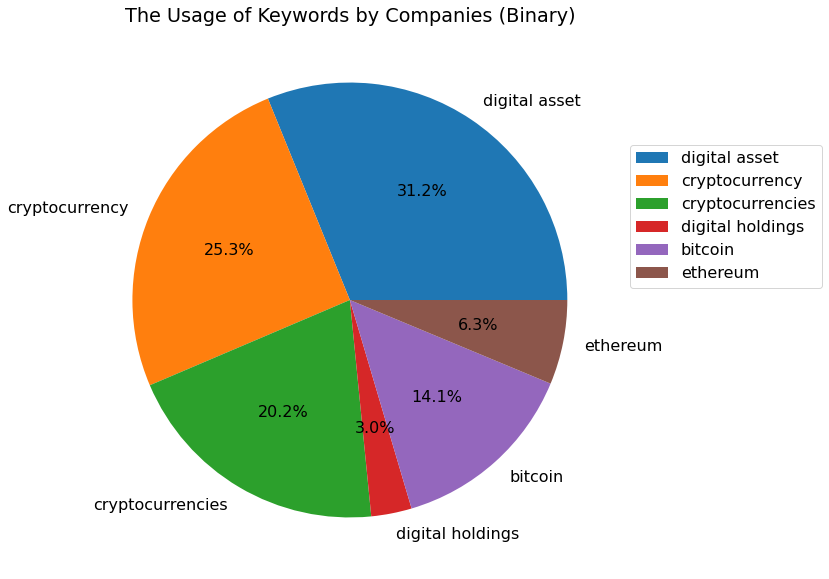

In [24]:
pd.DataFrame(binary_results.iloc[:,8:-12].sum(),columns=['Keyword']).plot.pie(y=0, autopct='%1.1f%%')
plt.title('The Usage of Keywords by Companies (Binary)')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.ylabel("")

Text(0, 0.5, '')

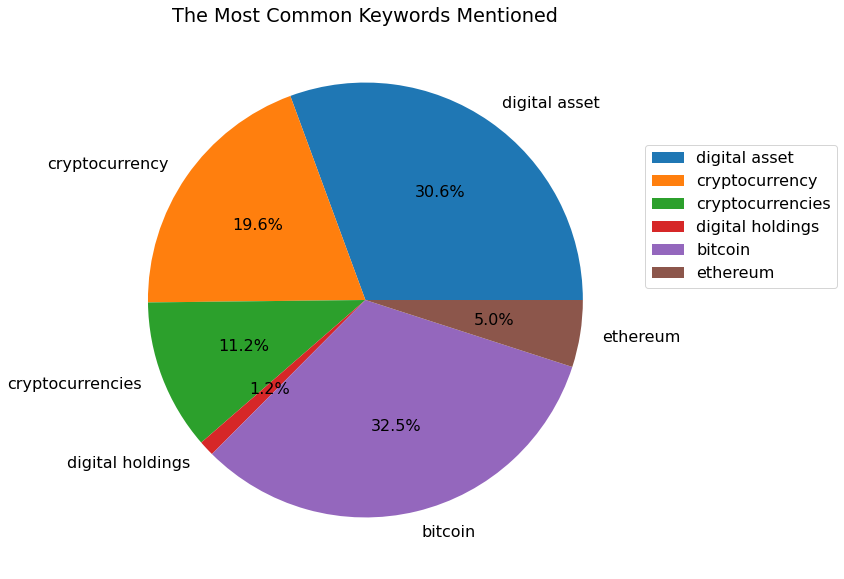

In [25]:
pd.DataFrame(results.iloc[:,8:-12].sum(),columns=['Keyword']).plot.pie(y=0, autopct='%1.1f%%')
plt.title('The Most Common Keywords Mentioned')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.ylabel("")

### Most Common Mentions Within Financial Tables

Text(0, 0.5, '')

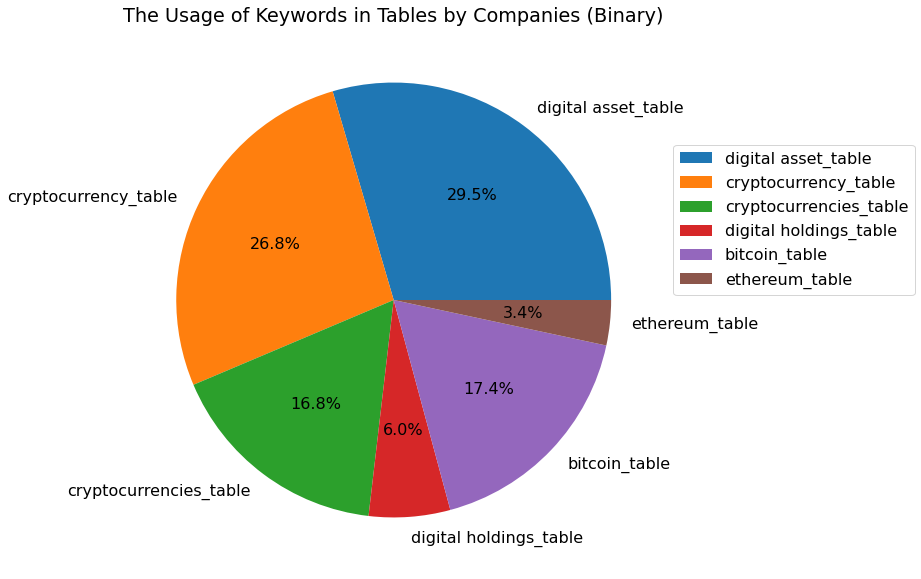

In [26]:
pd.DataFrame(binary_results.iloc[:,14:-6].sum(),columns=['Keyword']).plot.pie(y=0, autopct='%1.1f%%')
plt.title('The Usage of Keywords in Tables by Companies (Binary)')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.ylabel("")

Text(0, 0.5, '')

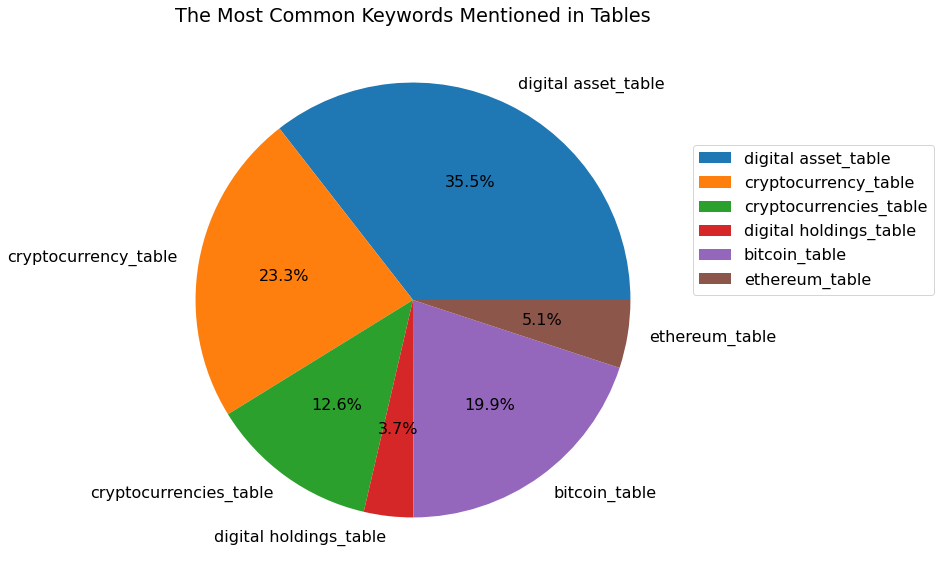

In [27]:
pd.DataFrame(results.iloc[:,14:-6].sum(),columns=['Keyword']).plot.pie(y=0, autopct='%1.1f%%')
plt.title('The Most Common Keywords Mentioned in Tables')
plt.legend(bbox_to_anchor=(1, 0.8))
plt.ylabel("")

In [28]:
results[results['Sub_industry']=='SERVICES-COMPUTER PROCESSING & DATA PREPARATION'].sort_values(ascending=False,by='sum').head(40)

,CIK,Company Name,SIC,Industry,State Location,State Inc,Filling Date,URL,digital asset,cryptocurrency,cryptocurrencies,digital holdings,bitcoin,ethereum,digital asset_table,cryptocurrency_table,cryptocurrencies_table,digital holdings_table,bitcoin_table,ethereum_table,sum,sum_tables,crypto_yes,crypto_table_yes,Office,Sub_industry
2121,1844971,Greenidge Generation Holdings Inc.,7374,SERVICES,CT,DE,2022-03-31,https://www.sec.gov/Archives/edgar/d...,78,252,44,0,413,0,5,10,0,0,3,0,787,18,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2161,1839341,"Core Scientific, Inc./tx",7374,SERVICES,TX,DE,2022-03-30,https://www.sec.gov/Archives/edgar/d...,584,3,1,1,158,9,17,0,0,1,3,0,756,21,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2101,1507605,"MARATHON DIGITAL HOLDINGS, INC.",7374,SERVICES,NV,NV,2022-03-10,https://www.sec.gov/Archives/edgar/d...,208,49,38,73,387,0,4,5,4,1,5,0,755,19,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2158,1829311,"BITMINE IMMERSION TECHNOLOGIES, INC.",7374,SERVICES,GA,DE,2021-12-09,https://www.sec.gov/Archives/edgar/d...,401,17,11,0,176,0,18,0,0,0,1,0,605,19,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2110,1083301,TERAWULF INC.,7374,SERVICES,MD,DE,2022-03-31,https://www.sec.gov/Archives/edgar/d...,189,48,39,1,292,2,3,0,0,0,5,0,571,8,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2102,1167419,"Riot Blockchain, Inc.",7374,SERVICES,CO,NV,2022-03-16,https://www.sec.gov/Archives/edgar/d...,8,72,164,0,321,0,0,0,26,0,2,0,565,28,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2144,1001601,"MGT CAPITAL INVESTMENTS, INC.",7374,SERVICES,NC,DE,2022-03-31,https://www.sec.gov/Archives/edgar/d...,23,98,95,1,323,1,2,1,2,0,5,0,541,10,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2142,1162896,"Creek Road Miners, Inc.",7374,SERVICES,UT,DE,2022-03-31,https://www.sec.gov/Archives/edgar/d...,16,249,81,0,174,0,0,29,4,0,5,0,520,38,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2130,1856028,"Stronghold Digital Mining, Inc.",7374,SERVICES,NY,DE,2022-03-29,https://www.sec.gov/Archives/edgar/d...,22,93,22,0,370,0,0,11,1,0,0,0,507,12,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...
2126,64463,"Soluna Holdings, Inc",7374,SERVICES,NY,NV,2022-03-31,https://www.sec.gov/Archives/edgar/d...,6,255,82,1,91,2,0,11,2,0,1,0,437,14,1,1,Office of Technology,SERVICES-COMPUTER PROCESSING & DATA ...


### Full words used in Tables

In [29]:
results_table = results_table.rename(columns={'index':'URL'})

In [30]:
info = results.iloc[:,0:8]

In [31]:
data_table=info.merge(results_table,on='URL')

In [32]:
data_table=data_table.replace('\n    ','Not Found')

In [33]:
pd.set_option('display.max_columns', None)
data_table.iloc[data_table.isnull().sum(axis=1).mul(1).argsort()].T

,35,26,42,0,1,3,29,28,23,47,31,20,16,44,4,60,25,30,12,65,38,27,22,11,5,37,9,8,13,36,51,7,43,19,18,17,6,32,24,40,45,62,50,64,53,33,67,39,34,21,41,2,10,63,14,61,15,59,46,57,55,54,52,66,49,48,58,56
CIK,1162896,1167419,1737372,1512673,1050446,1436229,1665300,1844971,1725210,1439264,1856028,1679788,1706509,1829966,1730869,896493,1507605,64463,862651,1495231,1839341,1218683,1640384,1210618,1454742,1829311,1819035,837852,1314196,1001601,894556,1318605,827876,880631,1783879,1525852,1880613,1597846,1605057,860131,1422892,1803914,1614826,1661039,1830547,1688126,1641398,1374310,1419951,1823144,1703157,1820302,1325702,1827899,1515139,1484769,1058307,1801417,1419275,1842373,1845550,1834336,1873441,1357671,1652958,1791325,1851909,1862463
Company Name,"Creek Road Miners, Inc.","Riot Blockchain, Inc.","Sysorex, Inc.","Block, Inc.",MICROSTRATEGY Inc,BTCS Inc.,"Phunware, Inc.",Greenidge Generation Holdings Inc.,Grayscale Ethereum Trust (ETH),Bonanza Goldfields Corp.,"Stronghold Digital Mining, Inc.","Coinbase Global, Inc.",Cosmos Group Holdings Inc.,"EBET, Inc.","Everything Blockchain, Inc.","BitNile Holdings, Inc.","MARATHON DIGITAL HOLDINGS, INC.","Soluna Holdings, Inc","Investview, Inc.","IZEA Worldwide, Inc.","Core Scientific, Inc./tx",Mawson Infrastructure Group Inc.,"LM FUNDING AMERICA, INC.","SPI Energy Co., Ltd.","GOOD GAMING, INC.","BITMINE IMMERSION TECHNOLOGIES, INC.","Metromile, Inc.","IDEANOMICS, INC.","OLB GROUP, INC.","MGT CAPITAL INVESTMENTS, INC.","General Enterprise Ventures, Inc.","Tesla, Inc.","CLEANSPARK, INC.","WisdomTree Investments, Inc.","Robinhood Markets, Inc.","BOTS, Inc./PR","Direct Digital Holdings, Inc.",Greenpro Capital Corp.,"Vemanti Group, Inc.",Wave Sync Corp.,Singularity Future Technology Ltd.,"PLBY Group, Inc.","Edge Data Solutions, Inc.","TPT GLOBAL TECH, INC.",Science Strategic Acquisition Corp. ...,Crypto Co,Code Chain New Continent Ltd,"Cboe Global Markets, Inc.",Data Storage Corp,"CompoSecure, Inc.","Securetech Innovations, Inc.","Bakkt Holdings, Inc.",MAGNACHIP SEMICONDUCTOR Corp,Crown PropTech Acquisitions,CurrencyWorks Inc.,fuboTV Inc. /FL,NextPlat Corp,byNordic Acquisition Corp,GreenBox POS,LDH Growth Corp I,Alpha Partners Technology Merger Corp.,Finserv Acquisition Corp. II,Blockchain Coinvestors Acquisition C...,"Creatd, Inc.","FOURTH WAVE ENERGY, INC.",Freedom Internet Group Inc.,Compass Digital Acquisition Corp.,Insight Acquisition Corp. /DE
SIC,7374,7374,7371,7372,7372,7372,7374,7374,6199,8742,7374,6199,4210,7900,7372,3679,7374,7374,7389,7310,7374,7374,6199,3674,7372,7374,6331,3711,7389,7374,4955,3711,7373,6211,6211,2111,7370,7374,6199,2860,4731,5900,3790,4899,6770,7374,5050,6200,7374,6199,3714,7372,3674,5072,7389,7812,4813,6770,8742,6770,6770,6770,6770,7819,8082,6794,6770,6770
Industry,SERVICES,SERVICES,SERVICES,SERVICES,SERVICES,SERVICES,SERVICES,SERVICES,FINANCE SERVICES,SERVICES,SERVICES,FINANCE SERVICES,TRUCKING & COURIER SERVICES,SERVICES,SERVICES,ELECTRONIC COMPONENTS,SERVICES,SERVICES,SERVICES,SERVICES,SERVICES,SERVICES,FINANCE SERVICES,SEMICONDUCTORS & RELATED DEVICES,SERVICES,SERVICES,FIRE,MOTOR VEHICLES & PASSENGER CAR BODIES,SERVICES,SERVICES,HAZARDOUS WASTE MANAGEMENT,MOTOR VEHICLES & PASSENGER CAR BODIES,SERVICES,SECURITY BROKERS,SECURITY BROKERS,CIGARETTES,SERVICES,SERVICES,FINANCE SERVICES,INDUSTRIAL ORGANIC CHEMICALS,ARRANGEMENT OF TRANSPORTATION OF FRE...,RETAIL,MISCELLANEOUS TRANSPORTATION EQUIPMENT,COMMUNICATION SERVICES,BLANK CHECKS,SERVICES,WHOLESALE,SECURITY & COMMODITY BROKERS,SERVICES,FINANCE SERVICES,MOTOR VEHICLE PARTS & ACCESSORIES,SERVICES,SEMICONDUCTORS & RELATED DEVICES,WHOLESALE,SERVICES,SERVICES,TELEPHONE COMMUNICATIONS,BLANK CHECKS,SERVICES,BLANK CHECKS,BLANK CHECKS,BLANK CHECKS,BLANK CHECKS,SERVICES,SERVICES,PATENT OWNERS & LESSORS,BLANK CHECKS,BLANK CHECKS
State Location,UT,CO,VA,CA,VA,MD,X1,CT,CT,U0,NY,DE,K3,NV,FL,NV,NV,NY,NJ,FL,TX,C3,FL,CA,PA,GA,CA,NY,NY,NC,WY,CA,NV,NY,CA,PR,TX,N8,CA,NY,NY,CA,GA,CA,CA,CA,F4,IL,NY,NJ,MN,GA,N4,E9,CA,NY,FL,V7,CA,FL,NY,NY,E9,NJ